# Examen Módulo 2

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

# ANTES DE EMPEZAR

Escribe tu número de expediente como semilla

In [1]:
import numpy as np
np.random.seed(747818)

empresas = ["Spotify", "Mercado Libre", "Microsoft", "Walmart", "Google", "Tesla", "Netflix", "Amazon", "Oracle", "Intel"]

print("Simulación Monte Carlo - Problema " + str(np.random.choice([1, 2])))
print("Integración Monte Carlo Tipo 1 - Problema " + str(np.random.choice([1, 2])))
print("Integración Monte Carlo Tipo 2 - Función " + str(np.random.choice([1, 2])))
print("Fractales - Fractal " + str(np.random.choice([1, 2])))
print("Probabilidad Precio-Umbral - Empresas: (" + str(np.random.choice(empresas, 2, replace=False)) + ")")

Simulación Monte Carlo - Problema 1
Integración Monte Carlo Tipo 1 - Problema 2
Integración Monte Carlo Tipo 2 - Función 1
Fractales - Fractal 1
Probabilidad Precio-Umbral - Empresas: (['Mercado Libre' 'Google'])


---
### Simulación Monte Carlo - Problema 1

Un proyecto de construcción en una casa está por comenzar. Se hace la compra de los materiales y el proveedor dice que en promedio tardan una semana con 2 días de desviación estándar en llegar. Una vez llegados los materiales se tarda entre 2 y 3 semanas en construir (uniforme). Después de la construcción debes esperar 3 días antes de empezar a pintar, y te toma 4 días en promedio con medio día de desviación estándar hacerlo.

1. Define una función que te regrese el tiempo total de inicio a fin de proyecto dados los tiempos que toma cada paso.

In [2]:
import numpy as np

def tiempo_total_proyecto(tiempo_compra_materiales, tiempo_construccion, tiempo_espera_pintura, tiempo_pintura):
    
    tiempo_llegada_materiales = np.random.normal(tiempo_compra_materiales, 2)

    tiempo_construccion = np.random.uniform(tiempo_construccion[0], tiempo_construccion[1])
    

    tiempo_pintura = np.random.normal(tiempo_pintura, 0.5)

    
    tiempo_total = tiempo_llegada_materiales + tiempo_construccion + tiempo_espera_pintura + tiempo_pintura
    
    return tiempo_total


tiempo_compra_materiales = 7  # 1 semana (7 días)
tiempo_construccion = (14, 21)  # Entre 2 y 3 semanas (14-21 días)
tiempo_espera_pintura = 3  # 3 días
tiempo_pintura = 4  # 4 días

tiempo_total = tiempo_total_proyecto(tiempo_compra_materiales, tiempo_construccion, tiempo_espera_pintura, tiempo_pintura)
print("El tiempo total del proyecto es:", tiempo_total, "días")


El tiempo total del proyecto es: 33.50162147636883 días


2. Escribe en una celda de Markdown qué distribución usarías para cada paso del proceso.

1. **Tiempo de llegada de los materiales**: Se puede utilizar una **distribución normal** para modelar el tiempo de llegada de los materiales, ya que el proveedor dice que en promedio tardan una semana (7 días) con 2 días de desviación estándar. La distribución normal sirve para modelar eventos que siguen una distribución de campana de Gauss.

2. **Tiempo de construcción**: Se puede utilizar una **distribución uniforme** para modelar el tiempo de construcción, ya que se indica que el tiempo de construcción se encuentra en el rango de 2 a 3 semanas. La distribución uniforme sirve cuando todos los valores dentro de un rango son igualmente probables.
3. **Tiempo de espera antes de la pintura**: Este paso toma exactamente 3 días, por lo que no se necesita una distribución, sino un valor fijo.

4. **Tiempo de pintura**: Aquí se puede utilizar otra vez una **distribución normal** para modelar el tiempo de pintura, ya que se toma un promedio de 4 días con medio día de desviación estándar.


3. Simula cada paso en el proceso un millón de veces.

In [105]:
import numpy as np

tiempo_compra_materiales = 7
tiempo_construccion = (14, 21)
tiempo_espera_pintura = 3
tiempo_pintura = 4

num_simulaciones = 1000000


tiempos_llegada_materiales = np.random.normal(tiempo_compra_materiales, 2, num_simulaciones)


tiempos_construccion = np.random.uniform(tiempo_construccion[0], tiempo_construccion[1], num_simulaciones)


tiempos_espera_pintura = np.full(num_simulaciones, tiempo_espera_pintura)


tiempos_pintura = np.random.normal(tiempo_pintura, 0.5, num_simulaciones)


tiempos_totales = tiempos_llegada_materiales + tiempos_construccion + tiempos_espera_pintura + tiempos_pintura




4. Agrupa las simulaciones de cada paso para tener la simulación del proceso completo.

In [110]:
import numpy as np

tiempo_compra_materiales = 7
tiempo_construccion = (14, 21)
tiempo_espera_pintura = 3
tiempo_pintura = 4


num_simulaciones = 1000000

tiempos_llegada_materiales = np.random.normal(tiempo_compra_materiales, 2, num_simulaciones)


tiempos_construccion = np.random.uniform(tiempo_construccion[0], tiempo_construccion[1], num_simulaciones)


tiempos_espera_pintura = np.full(num_simulaciones, tiempo_espera_pintura)


tiempos_pintura = np.random.normal(tiempo_pintura, 0.5, num_simulaciones)


tiempos_totales = tiempos_llegada_materiales + tiempos_construccion + tiempos_espera_pintura + tiempos_pintura



5. ¿Cuál es el tiempo promedio para el inicio-fin del proyecto?

In [111]:
tiempo_promedio = np.mean(tiempos_totales)
print("El tiempo promedio para el inicio-fin del proyecto es:", tiempo_promedio, "días")


El tiempo promedio para el inicio-fin del proyecto es: 31.500708065548395 días


6. Dadas tus simulaciones, ¿cuál fue el tiempo mínimo? ¿El máximo?

In [108]:
tiempo_minimo = np.min(tiempos_totales)
tiempo_maximo = np.max(tiempos_totales)

print("Tiempo mínimo para el inicio-fin del proyecto:", tiempo_minimo, "días")
print("Tiempo máximo para el inicio-fin del proyecto:", tiempo_maximo, "días")


Tiempo mínimo para el inicio-fin del proyecto: 19.498492586114338 días
Tiempo máximo para el inicio-fin del proyecto: 43.60037664746836 días


7. Grafica un histograma con tus resultados.

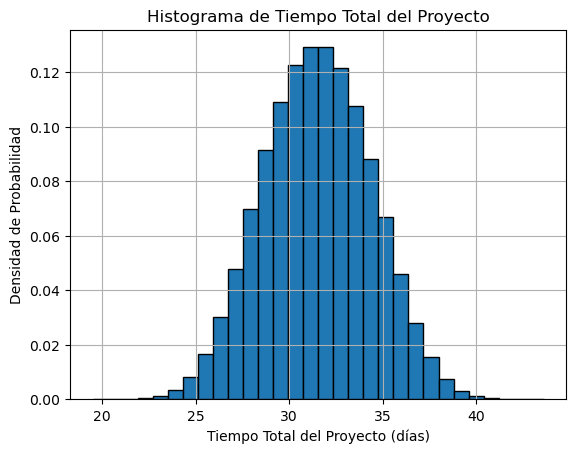

In [109]:
import matplotlib.pyplot as plt

plt.hist(tiempos_totales, bins=30, edgecolor='k', density=True)
plt.xlabel("Tiempo Total del Proyecto (días)")
plt.ylabel("Densidad de Probabilidad")
plt.title("Histograma de Tiempo Total del Proyecto")
plt.grid(True)
plt.show()



### Integración Monte Carlo tipo 1 - Problema 2

Dadas las funciones

$$ f_1(x) = \sin{(x)}e^{-\frac{x}{10}} + 1$$

$$ f_2(x) = 0.15x $$

$$ x \in [0, 4\pi]$$

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

In [119]:
import numpy as np

def integracion_montecarlo_tipo1(f, a, b, N):
    # Generar N números aleatorios uniformemente distribuidos en el intervalo [a, b]
    x = np.random.uniform(a, b, N)
    
    # Evaluar la función en los valores aleatorios generados
    y = f(x)
    
    # Calcular la integral aproximada como el promedio de los valores de la función multiplicado por la longitud del intervalo
    integral_aproximada = (b - a) * np.mean(y)
    
    return integral_aproximada

# Ejemplo de uso:
def f1(x):
    return np.sin(x) * np.exp(-x/10) + 1

a = 0
b = 4 * np.pi
N = 10000

resultado = integracion_montecarlo_tipo1(f1, a, b, N)
print("Resultado de la integral:", resultado)


Resultado de la integral: 13.280457479358017


In [ ]:
def f1(x):
    return np.e**(x**2)

def f2(x):
    return (1/np.log10(x))

def f3(x):
    return (np.sin(x)/x)

N = np.logspace(1, 7, 7)
a = 2
b = 2.1

tabla = pd.DataFrame(columns = ["Aproximacion1", "Error1","Aproximacion2", "Error2", "Aproximacion3", "Error3" ], index = N)


def montecarlo(f, N, a , b) :
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)

for i in N :
    aproximacion = montecarlo(f1, int(i), a, b)
    tabla.loc[i, "Aproximacion1"] = aproximacion
    tabla.loc[i, "Error1"] = abs(6.73789 - aproximacion)

for i in N :
    aproximacion = montecarlo(f2, int(i), a, b)
    tabla.loc[i, "Aproximacion2"] = aproximacion
    tabla.loc[i, "Error2"] = abs(0.320934 - aproximacion)

for i in N :
    aproximacion = montecarlo(f3, int(i), a, b)
    tabla.loc[i, "Aproximacion3"] = aproximacion
    tabla.loc[i, "Error3"] = abs(0.0432857 - aproximacion)

    
tabla

2. Defina las funciones dadas como funciones de Python, con argumento de entrada $x$.

3. Grafique las funciones en una sola figura. Utiliza el comando `plt.fill_between` para rellenar el área a integrar.

4. ¿Cuál es el área del espacio que se llenó después de `plt.fill_between`? Aproxima tu resultado con 1'000,000 puntos.

5. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales ($f_1(x)$, $f_2(x)$, área total)** y el **error** para $N=10^4,\, 10^5,\, 10^6$.

---
### Integración Monte Carlo tipo 2 
Dada una superfice en el espacio $f(x,y)$, una curva de nivel, es el corte transversal donde se cumple $f(x,y)=v$, con $v$ tal que pertenece al dominio de $f$. 



**Función 1:** Encuentre el área de todas las curvas de nivel que cumplan $f(x,y)>v$, donde 
$$
f(x,y)=-xy\,e^{-x^2-y^2},
$$
y $v=0.05$

**Función 2:** Encuentre el área que cumpla $f(x,y)>v$, donde 
$$
f(x,y)=e^{-0.05(x^2+y^2)}\sin(x^2+y^2),
$$
y $v=0.5$.

1. Escriba la función que discrimine los puntos que satisfacen la restricción $f(x,y)>v$, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

In [117]:
import math

def region(x,y):
    return -x*y*np.e(-x**2-y**2)>0.5
region


<function __main__.region(x, y)>

2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

In [118]:
N=200
a1,b1 = -3,3
a2,b2 = -3,3

x=np.linspace(a1,b1,N)
y=np.linspace(a2,b2,N)
X,Y=np.meshgrid(x,y)

plt.scatter(X,Y,c=~region(X,Y),cmap='gray')
plt.grid()

TypeError: 'float' object is not callable

3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

In [27]:
def montecarlo2(region,a1,b1,a2,b2,N):
    ux=np.random.uniform(a1,b1,N)
    uy=np.random.uniform(a2,b2,N)
    B=region(ux,uy)
    AR=(b1-a1)*(b2-a2)
    return np.mean(B)*AR

In [28]:
montecarlo2(region, -3, 3, -3, 3, 10**7)

10.920402000000001

4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

In [29]:
N=np.logspace(4,6,3).astype('int')
N

array([  10000,  100000, 1000000])

In [30]:
import pandas as pd
import numpy as np
N=np.logspace(4,6,3).astype('int')
tabla=pd.DataFrame(index=N,columns=['Aprox','Error'])
AR=(b1-a1)*(b2-a2)
for n in N:
    tabla.loc[n,'Aprox']=montecarlo2(region,a1,b1,a2,b2,n)
    th=tabla.loc[n,'Aprox']/AR
    tabla.loc[n,'Error']=np.sqrt(th*(1-th)/n)
tabla

,Aprox,Error
10000,10.9512,0.004601
100000,10.97892,0.001456
1000000,10.91466,0.00046


---
### Generación de fractales

Los fractales de tipo Barnsley se generan con transformaciones afines con cierta probabilidad.

Genere un cuadro perturbado tridimensional con la ecuación:
$$
\begin{bmatrix}x_{k+1}\\y_{k+1}\\z_{k+1}
\end{bmatrix}=A_i\begin{bmatrix}x_k\\y_k\\z_k\end{bmatrix}+b_i
$$
Y sus respectivas matrices:

**Fractal 1:**

In [ ]:
import numpy as np

A0 = np.array([[0.5,0.1853,0],[0.1667,0.3639,-0.0962],[0,0.1555,0.5]])
b0 = np.array([-1.0462,-0.8914,1.2468]).reshape(-1, 1)

A1 = np.array([[0.5,0.042,0],[-0.1667,0.3639,-0.0962],[0,-0.2382,0.5]])
b1 = np.array([1.6029,-0.8914,0.2826]).reshape(-1, 1)

A2 = np.array([[0.5,-0.2273,0],[0,-0.3639,0.1925],[0,0.0827,0.5]])
b2 = np.array([-0.5567,-0.8914,-1.5294]).reshape(-1, 1)

A3 = np.array([[0.383,0,0.3214],[0,0.5,0],[-0.3214,0,0.383]])
b3 = np.array([0,1.2247,0]).reshape(-1, 1)

cuya probabilidad es la misma para cada $i=\{0,1,2,3\}$. Use la función scatter de una proyección 3D sobre los ejes:
```
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)
```

In [13]:
import pandas as pd
import numpy as np
import random 

In [14]:
i = np.arange(4)

A0 = np.array([[0.5,0.1853,0],[0.1667,0.3639,-0.0962],[0,0.1555,0.5]])
b0 = np.array([-1.0462,-0.8914,1.2468]).reshape(-1, 1)

A1 = np.array([[0.5,0.042,0],[-0.1667,0.3639,-0.0962],[0,-0.2382,0.5]])
b1 = np.array([1.6029,-0.8914,0.2826]).reshape(-1, 1)

A2 = np.array([[0.5,-0.2273,0],[0,-0.3639,0.1925],[0,0.0827,0.5]])
b2 = np.array([-0.5567,-0.8914,-1.5294]).reshape(-1, 1)

A3 = np.array([[0.383,0,0.3214],[0,0.5,0],[-0.3214,0,0.383]])
b3 = np.array([0,1.2247,0]).reshape(-1, 1)

x = [0]
y = [0]
for k in range(10000):
    i = random.choices([0,1,2,3], weights=df["$p_i$"])
    
    a = float(df["$a_i$"][i])
    b = float(df["$b_i$"][i])
    c = float(df["$c_i$"][i])
    d = float(df["$d_i$"][i])
    e = float(df["$e_i$"][i])
    f = float(df["$f_i$"][i])
    g = float(df["$p_i$"][i])
    
    xkm1=a*x[-1]+b*y[-1]+e
    ykm1=c*x[-1]+d*y[-1]+f
    
    x.append(xkm1)
    y.append(ykm1)

NameError: name 'df' is not defined

---
### Probabilidad Precio-Umbral
Se tiene la siguiente lista de empresas:
- Spotify
- Mercado Libre
- Microsoft
- Walmart
- Google
- Tesla
- Netflix
- Amazon
- Oracle
- Intel

Suponga que desea invertir en dos de ellas. Evalúe la probabilidad de obtener un retorno del 10% en tres meses a partir del 30 de septiembre del presente año.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *yfinance*, donde los argumentos de entrada sean los nombres de las empresas, la fecha de inicio, y la fecha de fin a los cuales se obtendrán los datos.

In [15]:
import yfinance as yf

2. Obtenga los precios de cierre ajustados desde el 30 de septiembre de 2021 al 29 de septiembre de 2023.

In [53]:
data = yf.download(["MELI", "GOOGL"], "2021-09-30", "2023-09-29")

[*********************100%%**********************]  2 of 2 completed


In [54]:
data = data["Adj Close"]

In [55]:
data.shift()

,GOOGL,MELI
Date,,
2021-09-30,NaN,NaN
2021-10-01,133.675995,1679.400024
2021-10-04,136.542999,1667.599976
2021-10-05,133.659500,1592.750000
2021-10-06,136.022995,1585.439941
...,...,...
2023-09-22,130.440002,1293.280029
2023-09-25,130.250000,1276.959961
2023-09-26,131.110001,1290.530029


3. Calcule el rendimiento **simple** para ambas empresas.

In [56]:
R = (data-data.shift())/data.shift()

<Axes: xlabel='Date'>

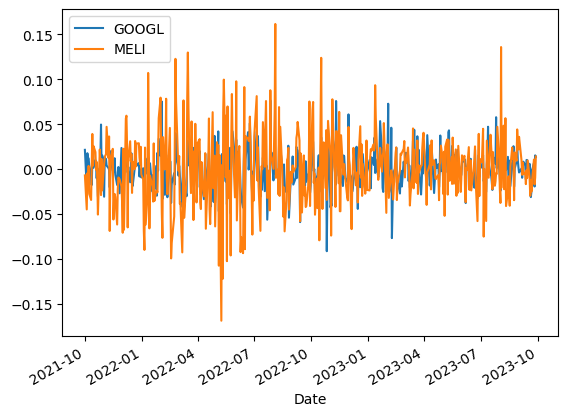

In [58]:
R.plot()

<Axes: ylabel='Frequency'>

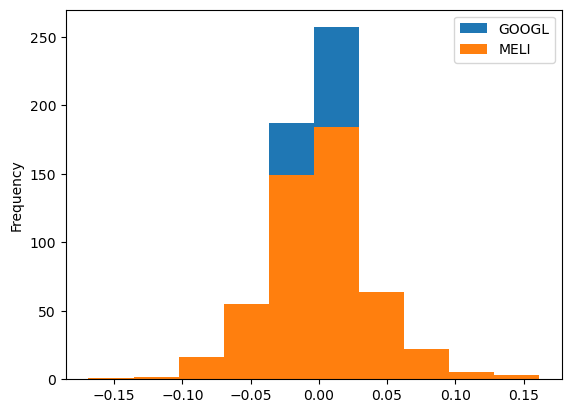

In [60]:
R.plot.hist()

In [61]:
R.describe()

,GOOGL,MELI
count,501.000000,501.000000
mean,0.000213,0.000241
std,0.021638,0.039824
min,-0.091405,-0.168789
25%,-0.013388,-0.024332
50%,-0.000084,0.001462
75%,0.012581,0.023514
max,0.076557,0.161595


In [74]:
R = data.pct_change().dropna()
R.head()
m=R.mean()
s=R.std()
m,s

(GOOGL    0.000213
 MELI     0.000241
 dtype: float64,
 GOOGL    0.021638
 MELI     0.039824
 dtype: float64)

4. Escriba una función que, dando como argumentos:
* un vector de valores
* la fecha de inicio,
* **la fecha del fin de simulación** (**NO el número de días**) y
* número de escenarios a simular;

calcula la media, la desviación estándar, y regrese en un _DataFrame_ de _pandas_ datos simulados de una distribución normal caracterizada cuyo índice sea el rango de fechas dadas como argumentos.

In [75]:
def simR(m,s,start,end,N):
    date=pd.date_range(start,end)
    dias=len(date)
    datos=np.random.normal(m,s,(dias,N))
    return pd.DataFrame(datos,index=date)

In [76]:
data.describe()

,GOOGL,MELI
count,502.000000,502.000000
mean,118.046862,1098.720300
std,17.811159,230.502000
min,83.430000,612.700012
25%,102.902502,898.524994
50%,117.566250,1131.950012
75%,133.671871,1247.897522
max,149.838501,1709.979980


5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 31 de marzo de 2023 al 31 de julio de 2023.

In [78]:
R_GOOGL=simR(m['GOOGL'],s['GOOGL'],'2023-10-01','2023-12-31',100000)
R_MELI=simR(m['MELI'],s['MELI'],'2023-10-01','2023-12-31',100000)

In [80]:
R_GOOGL.head(3)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2023-10-01,0.023142,0.042029,0.009491,-0.003900,0.035015,-0.000455,0.015704,-0.021216,0.007092,0.018833,...,-0.012432,0.007529,-0.023560,-0.029068,0.015540,0.031908,-0.018170,0.006755,0.021517,0.017423
2023-10-02,0.074907,0.061525,-0.027321,0.007652,0.025986,0.054877,-0.005514,-0.016596,-0.017244,0.055726,...,-0.016702,-0.007839,0.014031,-0.006910,-0.015363,-0.012458,-0.046016,-0.007629,-0.024673,0.008386
2023-10-03,-0.026769,-0.009359,0.014375,-0.005246,-0.026637,0.032327,-0.022351,-0.006666,-0.033094,-0.009316,...,-0.005178,-0.004921,0.004434,0.011168,-0.003947,-0.005477,0.020384,0.020103,-0.024944,-0.021702


In [81]:
R_MELI.head(3)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2023-10-01,0.069941,0.039499,-0.007102,0.045147,0.038490,0.021509,0.030123,-0.041006,-0.049728,-0.057288,...,-0.047371,0.015140,0.014721,-0.085442,-0.093796,-0.056609,-0.015257,0.021389,-0.031531,-0.010691
2023-10-02,-0.030607,0.022605,0.017740,-0.016476,0.044717,0.013081,-0.002024,0.035267,-0.044840,-0.034304,...,-0.002240,0.058445,0.045519,-0.026581,-0.013151,0.015595,-0.083514,-0.024934,-0.018408,0.072777
2023-10-03,-0.014206,-0.039572,0.044526,-0.007405,0.000737,-0.002065,-0.001999,0.016839,-0.050116,0.004837,...,-0.031653,-0.023002,0.034527,-0.032238,0.026444,-0.021077,0.048402,-0.004868,0.018495,-0.027895


6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

In [91]:
sim_meli = sim_R(R["MELI"].mean(), R["MELI"].std(),"2023-10-16", 100, 10000) 
sim_googl = sim_R(R["GOOGL"].mean(), R["GOOGL"].std(),"2023-10-16", 100, 10000)

In [92]:
sim_precios_meli = data["MELI"][-1] * (1 + sim_meli).cumprod()
sim_precios_googl = data["GOOGL"][-1] * (1 + sim_googl).cumprod()

7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10%. ¿Cuál genera mayores expectativas?

In [ ]:
porcentaje = 1.10 #Porcentaje del 10%
valor_deseado_meli = data["MELI"][-1] * porcentaje
valor_deseado_googl = data["GOOGL"][-1] * porcentaje

In [94]:
sobrepasa_meli = valor_deseado_meli <= sim_precios_meli
sobrepasa_googl = valor_deseado_googl <= sim_precios_googl

In [95]:
probabilidad_meli =  sobrepasa_meli.mean(axis=1)
probabilidad_googl =  sobrepasa_googl.mean(axis=1)

<Axes: >

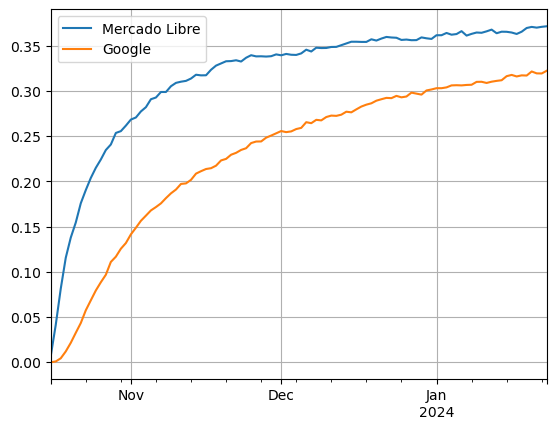

In [98]:
tabla = pd.DataFrame(index=probabilidad_meli.index)
tabla["Mercado Libre"] = probabilidad_meli
tabla["Google"] = probabilidad_googl
tabla.plot(grid=True)

<Axes: xlabel='Date'>

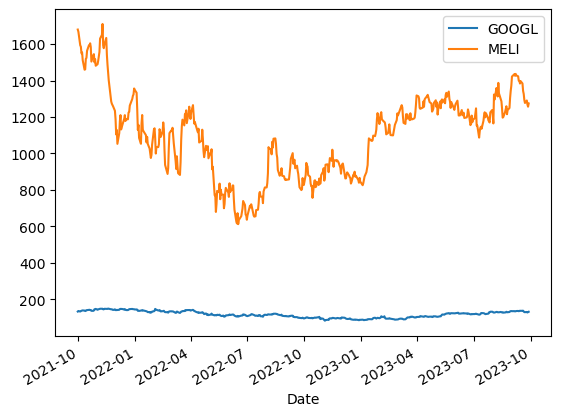

In [99]:
data.plot()

Genera más expectativas Mercado Libre